
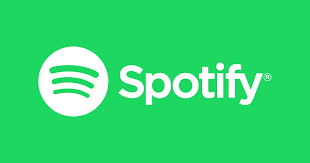

# Introduction
Have you ever wondered how music differs from country to country? 
<br>
Do the most played songs within a country share some common attributes?
<br>
Is there a common theme of the most listened songs world-wide?
<br>


If you answered yes to any of these questions keep reading because we are about to find out!
<br>
To try to answer these questions we are going to use data of *Spotify*, which is the world's largest music streaming platform by number of subscribers.



### Tutorial Content

For this tutorial we are going to use **Spotipy**.
**Spotipy** is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
We are going to analyze the Top 50 playlists of each of the countries in which Spotify is available. A full list of the countries in which Spotify is available can be found in the link in the References section.



### Installing the libraries

First, let's install the libraries.
Install Spotipy with:
<br>
pip install spotipy
<br>
Install plotly for data visualization with:
<br>
pip install plotly  
<br>
Then import the libraries:


In [19]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials #To access authorized Spotify data
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px #library used to visualize data

### Spotipy library

Spotipy library allows you to retrieve data in an easy way from the Spotify server. We could classify the available functions of the library as follows:
1. *Functions to make requests*: authorizes you to pass your credentials to make requests to the server.
<br>

2. *Descriptive functions*: get information like name from an artist, track, album or playlist, when the input is an id.Or get information about a current user.<br>
Example:<br>
album(album_id)<br>
    returns a single album given the album’s ID, URIs or URL<br>
    Parameters:<br>
    album_id - the album ID, URI or URL<br>
   <br> 
3. *Audio Analysis functions*: retrieves information that can help you do audio analysis.<br>
Example:<br>
audio_features(tracks=[])<br>
    Get audio features for one or multiple tracks based upon their Spotify IDs Parameters:<br>
    Parameters:<br>
    tracks - a list of track URIs, URLs or IDs, maximum: 50 ids<br>
We are using this function for the Example application.
<br>
    
4. *Recommendation functions*: get a recommended list of songs based on a music genre, country or artist. Also get recommendations of new releases.
Example:<br>
    recommendations(seed_artists=None, seed_genres=None, seed_tracks=None, limit=20, country=None, **kwargs)
    <br>

5. *Create functions*: allows you to create playlists for a user, add or delete tracks to a specific playlist.
<br>Example:<br>
    user_playlist_create(user, name, public=True, description='')<br>
    Creates a playlist for a user
<br>
Let's get started!

### Authorized requests
Spotipy allows you to access data from Spotify from either Authorized or Unauthorized requests. It's recommended to pass all the requests as authorized requests as there are more avialable functions and it also allows you to request more data.<br>
To make requests to the API you have to follow these steps: 
1. Have a Spotify user.
2. Register an application on the Developer Dashboard to get your credentials. https://developer.spotify.com/dashboard/login
3. Make authorized requests by either of these two methods: Authorization Code Flow and Client Credentials Flow. In this tutorial we are going to work with the last method.



**Client Credentials Flow**
<br>
Create a Spotify object to access the API
<br>
Here we first define a function to create the object, which we'll use later on.

In [2]:
def sp_object(client_id, client_secret):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)#pass credentials
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)#create object
    
    return sp


In [3]:
client_id= "2582c4f549094459983e6b5589624886"
client_secret= "d59b6141e9b441159ed10cba27abb068"
sp = sp_object(client_id, client_secret) #create spotify object to make requests using function we defined

For the purpose of this tutorial I created a cvs file with all the countries in which Spotify is available and its corresponding TOP 50 Playlist *uri* which I extracted from the Spotify Website. I also added some extra information like what continent and subregion they belong to, which can be used for further analysis.

In [4]:
import pandas as pd
df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')  #load dataframe


## Example application
Make a musical analysis of the most played songs of a country and visualize this data comparing countries.<br> 
The musical analysis we are going to perform will be based on the audio features of the most played songs of a country. To get the most played songs of a country we are going to use as a *proxy* **Spotify Top 50 playlists** per country, which are uploaded daily based on the most streamed songs on a particular location. <br>
The way Spotify generates these playlists is heavily influenced by Global Trends so we don't expect to see a lot of variation from country to country.<br>

#### Pipeline
**Extract the data**<br>
Desired ouput: a dataframe for Top 50 Playlist of a country that includes the audio features of each track.<br>
1. Define a function that returns a list of the tracks on a Top 50 playlist of a country. This for the purpose of extracting the data from Spotify's server.
2. Define a function that returns the *uri* for each track on a Top 50 playlist of a country. We do this because if we want to get the audio features of a playlist, the input has to be an uri. 
3. Define a function that generates a dictionary of the audio features for each of the tracks in a Top 50 playlist of a country.
4. Define a function that generates a dataframe with these audio features per track.<br>

**Analyze the data and Visualize the data**
<br>
For this purpose we are using the following library: plotly

### Step 1
To return a list of tracks of a Top50 playlist of a country I used the Spotipy function user_playlist_tracks. The parameters for this function are:
<br>
user - the id of the user. In our case Spotify.<br>
playlist_id - the id of the playlist. Provided by the dataframe I created.<br>
fields - which fields to return<br>
limit - the maximum number of tracks to return<br>
offset - the index of the first track to return<br>
market - an ISO 3166-1 alpha-2 country code.,<br>
defined the following function. <br>
Then, I defined my own function in which if you enter the name of a country in which Spotify is avaialable, you'll get the list of the tracks of that Top 50 playlist.
*The first letter of the name of the country has to be capitalized.*

In [5]:
def top50playlist_tracks(country):
    import pandas as pd
    df = pd.read_csv (r'TOP50_COUNTRIES_PLAYLIST_URI.csv')
    top50_uri = list(df['URI'])
    countries = list(df['country_name'])
    countries_uri = dict(zip(countries, top50_uri))
    tracks = sp.user_playlist_tracks('spotify', playlist_id= countries_uri[country], fields=None, limit=100, offset=0, market=None)
    return tracks

Define a function that returns the URI for each track on a TOP50 playlist of a country.

In [7]:
def uri_tracks_top50_country(country):
    tracks = top50playlist_tracks(country)
    uri_tracks = []
    name_tracks = []
    for i in range(len(tracks['items'])):
        uri = tracks['items'][i]['track']['uri']
        name = tracks['items'][i]['track']['name']
        uri_tracks.append(uri)
        name_tracks.append(name)
    
    dict_uri = dict(zip(name_tracks, uri_tracks))
        
    return dict_uri, uri_tracks, name_tracks

In the following function we are creating a dictionary for all the music features that we are interested in analyzing. For a more complete explanation of what these characteristics mean go to the Glossary section. 

In [8]:
def features_tracks(country):
    uri_tracks_top = uri_tracks_top50_country(country)[1]
    name_tracks = uri_tracks_top50_country(country)[2]
    features = sp.audio_features(list(uri_tracks_top)) #here we are using this function to get the audio features.
    
    ft_danceability = []
    ft_energy = []
    ft_key = []
    ft_loudness = []
    ft_mode = []
    ft_speechiness = []
    ft_acousticness = []
    ft_instrumentalness = []
    ft_liveness = []
    ft_valence = []
    ft_tempo = []
    for i in range(len(features)):
        danceability = features[i]['danceability']
        energy = features[i]['energy']
        key = features[i]['key']
        loudness = features[i]['loudness']
        mode = features[i]['mode']
        speechiness = features[i]['speechiness']
        acousticness = features[i]['acousticness']
        instrumentalness = features[i]['instrumentalness']
        liveness = features[i]['liveness']
        valence = features[i]['valence']
        tempo = features[i]['tempo']
        ft_danceability.append(danceability)
        ft_energy.append(energy)
        ft_key.append(key)
        ft_loudness.append(loudness)
        ft_mode.append(mode)
        ft_speechiness.append(speechiness)
        ft_acousticness.append(acousticness)
        ft_instrumentalness.append(instrumentalness)
        ft_liveness.append(liveness)
        ft_valence.append(valence)
        ft_tempo.append(tempo)
        
        data = {'track_name': name_tracks, 
        'uri': uri_tracks_top, 
        'danceability': ft_danceability,
        'energy' : ft_energy,
        'key' :ft_key,
        'loudness': ft_loudness,
        'mode': ft_mode,
        'speechiness' : ft_speechiness,
        'acousticness':ft_acousticness,
        'instrumentalness': ft_instrumentalness,
        'liveness': ft_liveness,
        'valence': ft_valence,
        'tempo' : ft_tempo 
        }
        
       
        
    return data

In this function we generate a dataframe using the dictionary generated in the previous function.

In [9]:
def df_audioft(data):
    import pandas as pd 
    audio_df = pd.DataFrame(data)
    
    return audio_df

To make a more automated process we can use the two previously created functions to generate a dataframe with the audio characteristics per track of the Top 50 playlist of a determined country.
The input is the country you want to analyze and the output will be the dataframe with the audio characteristics of the Top 50 Playlist.

In [10]:
def df_fin(country):
    data = features_tracks(country)
    audio_df = df_audioft(data)
    return audio_df
    

Now we can start creating a dataframe for the music features for each country.
For the scope of this tutorial I'm going to choose the following countries: Mexico, Colombia, United States,Egypt,Taiwan, Turkey and Spain.

In [11]:
df_mx = df_fin('Mexico')
df_co = df_fin('Colombia')
df_us = df_fin('United States')
df_eg = df_fin('Egypt')
df_tw = df_fin('Taiwan')
df_sp = df_fin('Spain')
df_tk = df_fin('Turkey')

Let's visualize the data! <br>
**Danceability**<br>
Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 

In [21]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
x_data = ['Mexico','Colombia','United States', 'Turkey', 'Spain', 'Taiwan', 'Egypt']
y0 = np.array(df_mx['danceability'])
y1 = np.array(df_co['danceability'])
y2 = np.array(df_us['danceability'])
y3 = np.array(df_tk['danceability'])
y4 = np.array(df_sp['danceability'])
y5 = np.array(df_tw['danceability'])
y6 = np.array(df_eg['danceability'])

y_data = [y0, y1, y2, y3, y4, y5, y6]
colors = ['rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)', 
          'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(127, 96, 0, 0.5)',
        'rgba(200, 124, 80, 0.5)', 'rgba(150, 170, 220, 0.5)', 'rgba(70, 170, 220, 0.5)' ]

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )
fig.update_layout(
    title='Danceability')

fig.show(renderer="notebook_connected")


With this preliminary analysis on the audio feature of 'danceability' we can see that the countries with the 'most danceable' songs on average are Spain, Mexico and Colombia.  Between Mexico and Colombia there are a lot of common songs. Also, their distributions have less degree of variation, than other countries like the United States for example.<br>
Now let's take a closer look at the audio features per country.

To visualize the audio features per country Top 50 playlist, we are using a graph called Polar. This will allow us to see characteristics that are stronger on average in a playlist. The audio features that I chose for this analysis are: danceability, speechiness, acousticness, liveness, valence and energy.All these features are measured in a countinuous scale that go from 0 to 1(inclusive), where 1 is the highest value.
<br> I left out tempo, key, loudness and mode from this visualization, mainly because these characteristics are measured in a different scale and some of them are also contained within some of the characteristics that we are already analyzing. For example, danceability already accounts for tempo and loudness, while valence accounts for key and mode.

In [13]:
def get_means(country):
    df = df_fin(country)
    d = df.mean()['danceability']
    s =df.mean()['speechiness']
    a = df.mean()['acousticness']
    i = df.mean()['instrumentalness']
    l = df.mean()['liveness']
    v = df.mean()['valence']
    e = df.mean()['energy']
    r = [d, s, a, i, l ,v, e]
    return r

We defines the previous function so we can get a list of the averages of the features, which we'll use for visualizing the data.

In [22]:
def audio_polar(country):
    import plotly.graph_objects as go

    fig = go.Figure(data=go.Scatterpolar(
      r= get_means(country),
      theta=['danceability','speechiness','acousticness', 'instrumentalness',
               'liveness', 'valence', 'energy'],
      fill='toself', fillcolor= 'rgba(93, 164, 214, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)')
    ))

    fig.update_layout(
      polar=dict(
       radialaxis=dict(
          visible=True,
           range=[0, 1]
        ),
      ),
      showlegend=False
    )

    return fig.show(renderer="notebook_connected")

In [23]:
audio_polar('Mexico')

For Mexico we can see that the most played songs, on average, are high on danceability, energy and valence. <br> 
How does it compares to others?<br>
To answer this question we are going to compare it to Taiwan, which had the lowest average for danceability.<br>

In [24]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Mexico'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(93, 164, 214, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Mexico'
))
fig.add_trace(go.Scatterpolar(
      r=get_means('Taiwan'),
      theta=categories,
      fill='toself',fillcolor ='rgba(255, 144, 14, 0.5)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Taiwan',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

Here we are comparing the audio features of the most played songs in Mexico and Taiwan. We can see that on average the most played songs in Mexico are more danceable, with higher energy and have a higher valence.Taiwan's most played songs are higher on acousticness and are similar on liveness.

In [25]:
import plotly.graph_objects as go

categories = ['danceability','speechiness','acousticness', 'instrumentalness',
           'liveness', 'valence', 'energy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=get_means('Spain'),
      theta=categories,
      fill='toself', fillcolor= 'rgba(46, 252, 222, .45)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='Spain'
))
fig.add_trace(go.Scatterpolar(
      r=get_means('United States'),
      theta=categories,
      fill='toself',fillcolor ='rgba(252, 146, 162, .6)', line=dict(width=1, color='rgb(127, 166, 238)'),
      name='United States',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show(renderer="notebook_connected")

In [26]:
import plotly.graph_objects as go
import numpy as np
x_data = ['Mexico','Colombia','United States', 'Turkey', 'Spain', 'Taiwan', 'Egypt']
y0 = np.array(df_mx['valence'])
y1 = np.array(df_co['valence'])
y2 = np.array(df_us['valence'])
y3 = np.array(df_tk['valence'])
y4 = np.array(df_sp['valence'])
y5 = np.array(df_tw['valence'])
y6 = np.array(df_eg['valence'])

y_data = [y0, y1, y2, y3, y4, y5, y6]
colors = ['rgba(93, 164, 214, 0.5)','rgba(255, 65, 54, 0.5)', 
          'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(127, 96, 0, 0.5)',
        'rgba(200, 124, 80, 0.5)', 'rgba(150, 170, 220, 0.5)', 'rgba(70, 170, 220, 0.5)' ]

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )
fig.update_layout(
    title='Valence')

fig.show(renderer="notebook_connected")


Valence corresponds to the level of 'happiness' in a song. It's interesting to see how it varies from country to country. And seems to be correlated with danceability. Also Mexico, Colombia and Egypt seem to have the 'happiest' songs on average.


Although we see some differences from country to country. Today's playlist are highly influenced by the Global Top 50 playlist. If we wanted to do further analysis we could compare the Global Playlist to the Top 50 playlists per country and look for similarities.

### Conclusion

It has been interesting to see how these recommendation systems have influenced, in a way, the songs people listen to. The Spotipy library also allows you to retrieve data with timestamps. For the purpose of another tutorial we could analyze how trends have changed over time, since the algorithms for recommending songs have evolved.

### Glossary
*uri*: The resource identifier that you can enter, for example, in the Spotify Desktop client’s search box to locate an artist, album, or track.<br>
*Top 50 Playlist*: Spotify creates these playlist based on the most listened songs of a country. These playlists are updated daily, however there's not a lot of variation from day to day, even weekly.
<br>
*valence*: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
*danceability*: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>



### References and Resources

Spotify trends and market https://www.businessofapps.com/data/spotify-statistics/
<br>
Spotipy documentation: https://spotipy.readthedocs.io/en/latest/#
<br>
List of Countries in which Spotify is available: https://support.spotify.com/us/using_spotify/the_basics/full-list-of-territories-where-spotify-is-available/